# 12. 다양한 OCR 모델 비교하기

## 데이터 불러오기

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,f1_score

In [2]:
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
data_path = '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image'
data_path

'/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image'

In [4]:
# 입력 이미지 경로 
file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)
file_path

['/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/0.jpg',
 '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/1.jpg',
 '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/10.png',
 '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/2.jpg',
 '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/3.jpg',
 '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/4.png',
 '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/5.jpg',
 '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/6.jpg',
 '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/7.jpg',
 '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/8.png',
 '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/image/9.jpg']

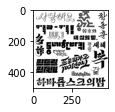

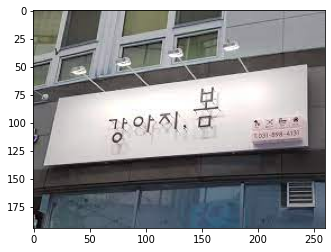

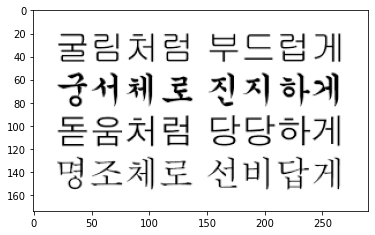

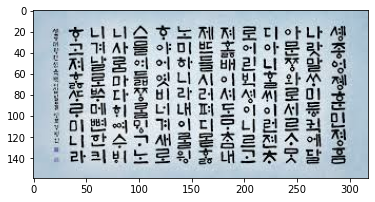

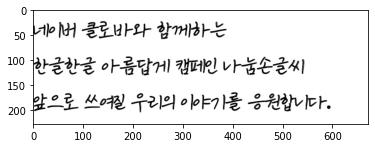

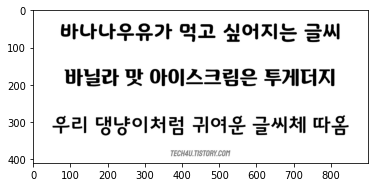

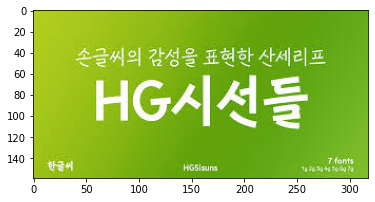

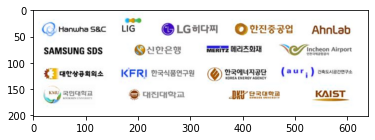

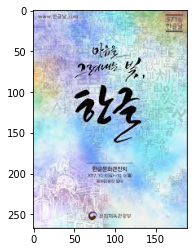

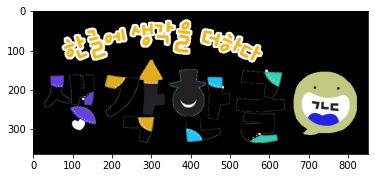

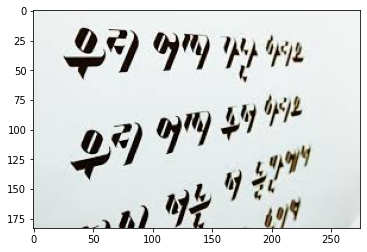

In [5]:
rows = 6
cols = 2
fig = plt.figure(figsize=(20,10))
for idx, path in enumerate(file_path, 1):
    ax = fig.add_subplot(rows, cols, idx)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    # rgb = img.convert('rgb')
    plt.imshow(img)
    
    plt.show()

### Google OCR API

In [6]:
def detect_text(path):
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    image = vision.Image(content=content)
    
    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    #     for text in texts:
    print('\n"{}"'.format(texts[0].description))
    
    vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in texts[0].bounding_poly.vertices])
    
    print('bounds: {}'.format(','.join(vertices)))
    
    if response.error.message:
        raise Exception(
        '{}\nFor more info on erroe messages, check:' 
        'https://cloud.google.com/apis/design/errors'.format(
        response.error.message))
    
    return texts[0].description

In [32]:
#  !pip install google-cloud-vision 

In [7]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

total 8
drwx------ 6 root root 4096 Jun 15 11:02 drive
drwxr-xr-x 1 root root 4096 Jun  1 13:50 sample_data


In [8]:
# 다운받은 google ocr api 인증키 경로 저장 확인
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/big-genre-352803-102f63f9a78b.json'

In [9]:
# ocr api 함수 호출
google_ocr_result = []
for path in file_path:
    result = detect_text(path)
    google_ocr_result.extend(result)

Texts:

"사랑해요. 조
ㅌㅇ 韓東勳
내 삶의 빛.
한마리 세해
편
트로피카크
복
Rasgogin
하바롭스크의밤
1.4 - 21.4
J
반해반해
버렸어요
Tropical AFTE"
bounds: (7,2),(490,2),(490,501),(7,501)
Texts:

"강아지, 봄
1681-858-6137"
bounds: (62,70),(235,70),(235,121),(62,121)
Texts:

"굴림처럼 부드럽게
궁서체로 진지하게
돋움처럼 당당하게
명조체로 선비답게"
bounds: (19,20),(265,20),(265,155),(19,155)
Texts:

"솅종엉젱훈민정음
나랏말미 에달
아문화로서
아이진호
로어린백성이니르고
이
내
제들시러
노미하니라내이룰
훑
너 새로
ㅎ야
스물여덟줄ㄱ노
니사마다 스스비
호
니계날로.메뻔한리
고, 미니라
구"
bounds: (17,12),(295,12),(295,144),(17,144)
Texts:

"네이버 클로바와 함께하는
한글한글 아름답게 캠페인 나눔손글씨
앞으로 쓰여질 우리의 이야기를 응원합니다."
bounds: (-6,19),(594,19),(594,203),(-6,203)
Texts:

"바나나우유가 먹고 싶어지는 글씨
바닐라 맛 아이스크림은 투게더지
우리 댕냥이처럼 귀여운 글씨체 따옴
TECH4U.TISTORY.COM"
bounds: (51,32),(846,32),(846,393),(51,393)
Texts:

"한글씨
손글씨의 감성을 표현한 산세리프
HG시선들
HGSisuns
7 fonts
16:20 30 + 50 60 70"
bounds: (12,33),(303,33),(303,154),(12,154)
Texts:

"Hanwha S&C
SAMSUNG SDS
대한상공회의소
KMU 국민대학교
LIG G LG히다찌
신한은행
KFRI 한국식품연구원
대진대학교
한진중공업
AhnLab
Incheon Airport
인천국제공항공사
(auri) 건축도시공간연구소
KAIST
MERITZ 메리츠화재
한국에너지공단
K

In [31]:
# !pip install keras_ocr

In [10]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [11]:
# url이 아닌 file path도 가능하다. 

# image_urls = ['https://drive.google.com/uc?id=1L7e_7WDtEHHYz4pKWykOlIiU1whEM8lt',
#               'https://drive.google.com/uc?id=12diOJYkBxPbNxjBlvFdEr_o5JUxqNAig',
#               'https://drive.google.com/uc?id=1XgNK2oKaP9-rmV9eMWuRavFCAvKt8KbR',
#               'https://drive.google.com/uc?id=1xd4VEXMxltmX6WvCL18jictvTzJP2G0J',
#               'https://drive.google.com/uc?id=1B2Ntq8Q8-SBfJaJ7ns0tZCqTMGECVjtJ',
#               'https://drive.google.com/uc?id=1YM17G5zCOndt_bP59SP9YG6QMA2EXr6F',
#               'https://drive.google.com/uc?id=1pdjMwxv62F-JIVjT-mfFUQTLtRdgkwOO',
#               'https://drive.google.com/uc?id=13SP7G1Df0OWPb35r47eB_oYjJEF55sbH',
#               'https://drive.google.com/uc?id=1AzWuX6IkpZczoDlztDg7uZ-7EV-XP9v-',
#               'https://drive.google.com/uc?id=1RG8TZciXLH5k_gl0NvLp40FAGLNfcU_1']
             

images = [keras_ocr.tools.read(path) for path in file_path]
prediction_groups = [pipeline.recognize({path}) for path in file_path]

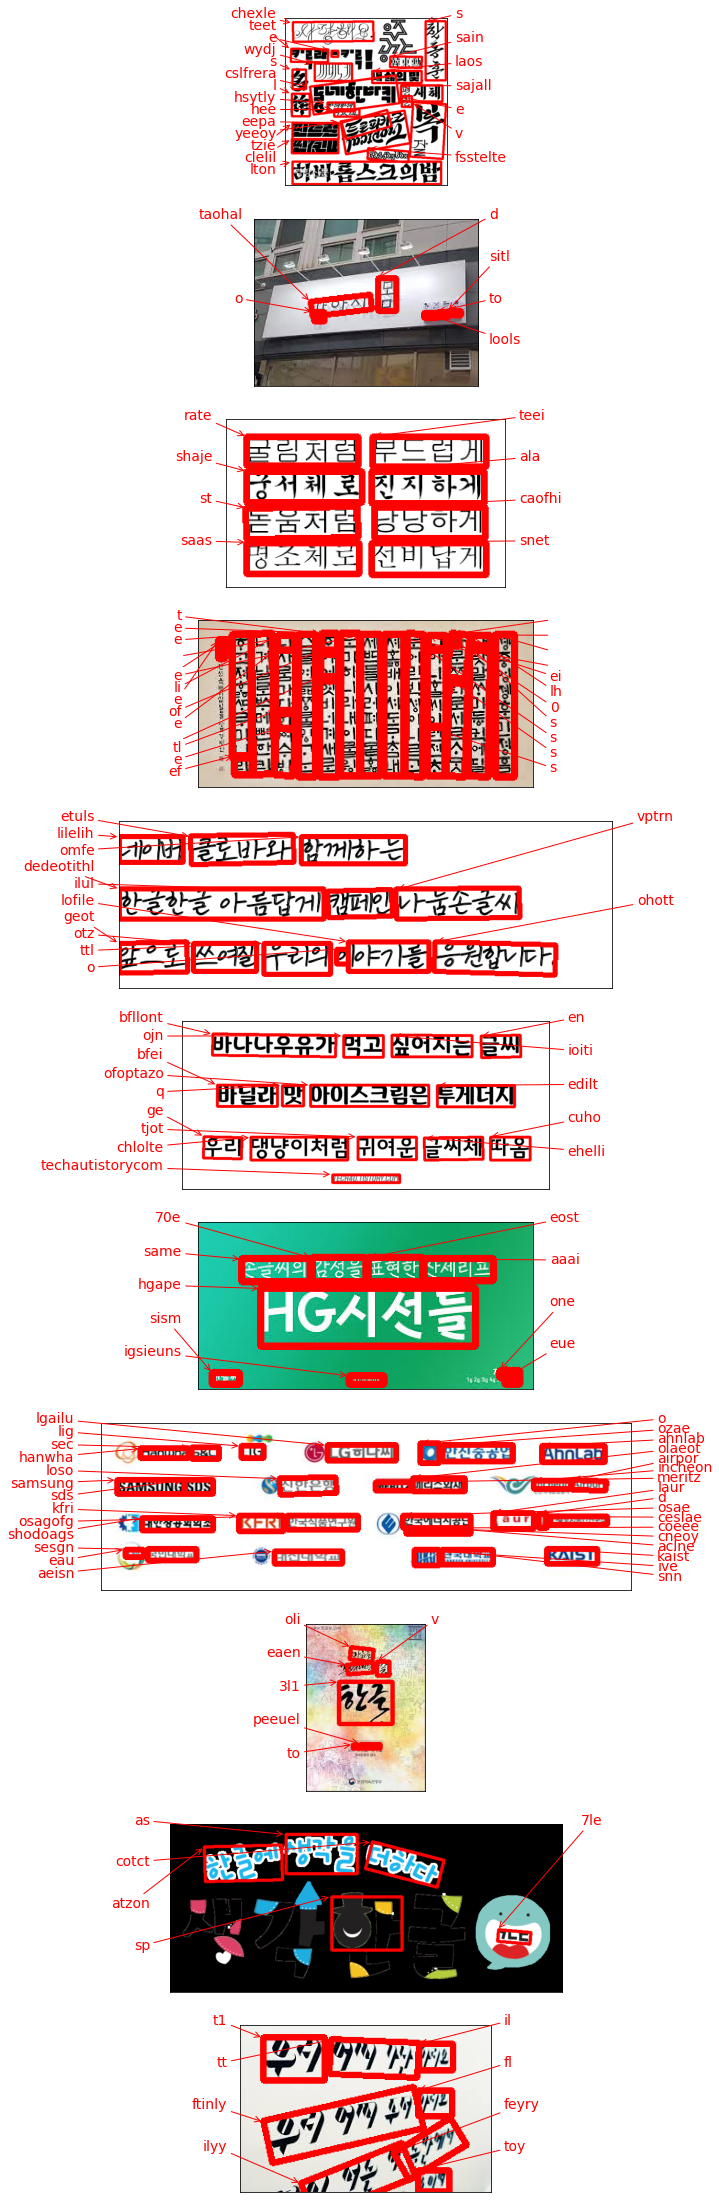

In [33]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(40, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [30]:
# !pip install pillow==4.1.1
# %reload_ext autoreload
# %autoreload

In [29]:
# !pip install pytesseract

In [28]:
# pip list | grep keras-ocr

In [27]:
# !sudo apt install tesseract-ocr

In [26]:
# !sudo apt install libtesseract-dev

In [25]:
# !sudo apt-get install tesseract-ocr-kor

## Tesseract

In [14]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


In [16]:
work_dir = '/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor'

tesseract_result_path = []
for path in file_path:
    try:
      image_path_list = crop_word_regions(path, work_dir)
      tesseract_result_path.extend(image_path_list)
    except:
      print("점입니다.")

/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0000.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0001.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0002.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0003.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0004.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0005.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0006.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0007.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0008.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0009.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0010.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0011.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0012.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0013.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0014.png
/content/drive/MyDrive/AIFFEL/EXP/data/ocr_image/kor/0015.png
/content

In [20]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(tesseract_result_path)

ee")

yt)

HM

Mey

Ms/h

a

"y

Ly}

a4

,

Lym

+. Ad

Ig

40/9

£5 cyereseaiojs

KFRI

ee")

ee")

yt)

HM

Mey

Ms/h

a

"y

Ly}

a4

ee")

yt)

HM

Mey

Ms/h

a

"y

Ly}

a4

,

Lym

+. Ad

Ig

40/9

£5 cyereseaiojs

KFRI

ee")

yt)

HM

Mey

Ms/h

a

"y

Ly}

a4

,

Lym

+. Ad

Ig

40/9

£5 cyereseaiojs

KFRI

Cr AIS OI

(GY)

Or OF

ese

AGE NLT

ee")

yt)

HM

Mey

Ms/h

a

"y

ee")

yt)

HM

Mey

Ms/h

a

"y

Ly}

a4

,

Lym

+. Ad

Ig

40/9

£5 cyereseaiojs

KFRI

Cr AIS OI

(GY)

Or OF

ese

AGE NLT

(aur.

)

Ce SA ae chSe ss

A eckceectnnn

Se

CHS ICH al

Bite

ws a Ot SY al

KAIST

ee")

yt)

HM

Mey

Ms/h

ee")

ee")

yt)

HM

Mey

Ms/h

a

"y

Ly}

a4

,

Lym

+. Ad

Ig

40/9

Done


In [24]:
# !sudo apt-get install tesseract-ocr-kor

In [23]:
def recognize_images(cropped_image_path_list, lang='kor'):
    custom_oem_psm_config = r' --oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang=lang,
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print('Done')
#     return recognized_data


recognize_images(tesseract_result_path)

고

“/

//

인

00

<,

1“

49 7

9”

, 0

0"

7

07

0?

릇 ： 대한상공회의소

1<『ㄷ101

고

고

“/

//

인

00

<,

1“

49 7

9”

고

“/

//

인

00

<,

1“

49 7

9”

, 0

0"

7

07

0?

릇 ： 대한상공회의소

1<『ㄷ101

고

“/

//

인

00

<,

1“

49 7

9”

, 0

0"

7

07

0?

릇 ： 대한상공회의소

1<『ㄷ101

안국식품연구원

(<)

한국에

노지 게너시승난

ㅠㅠ

고

“/

//

인

00

<,

1“

고

“/

//

인

00

<,

1“

49 7

9”

, 0

0"

7

07

0?

릇 ： 대한상공회의소

1<『ㄷ101

안국식품연구원

(<)

한국에

노지 게너시승난

ㅠㅠ

(34.

)

안축노시송긴연구소

개 방대배러우

ㅎㅎ

내즌]대학 고

^

난곡 내악10

니51

고

“/

//

인

00

고

고

“/

//

인

00

<,

1“

49 7

9”

, 0

0"

7

07

0?

Done


회고

1. 우리말 고어 이미지를 사용하였는 데 글씨를 잘 인식하지 못하였다.

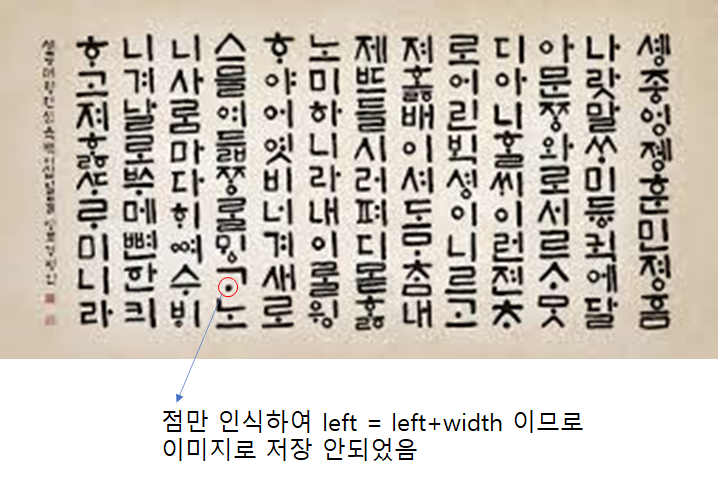

2. 기울기가 있는 값은 잘 인식하지 못하였다. "우리 어찌 가난하리오"에서 "어찌" 부분인데 기울어져 있어서 인식을 잘 못하였다.
0011.png

3. 글씨체하고도 관련이 있었다. 고어체인 경우도 잘 인식을 못하였고 한 글자에 다양한 색깔이 있는 경우에도 인식을 잘 못하였다.